# Automatic Labeling Workflow Demostration

### Import required libraries

In [1]:
from auto_labeling import ImageCollection, Augmentation, opening, closing
import matplotlib.pyplot as plt
import random

### Load images and resize them

In [3]:
image_collection = ImageCollection('data/surgical_tools')
image_collection.load_images()
image_collection.resize_images()

Images loaded
Images resized


### Create masks and plot image(s) to inspect the result

In [4]:
image_collection.get_mask(threshold=80, morph=(closing, 5))

Mask created


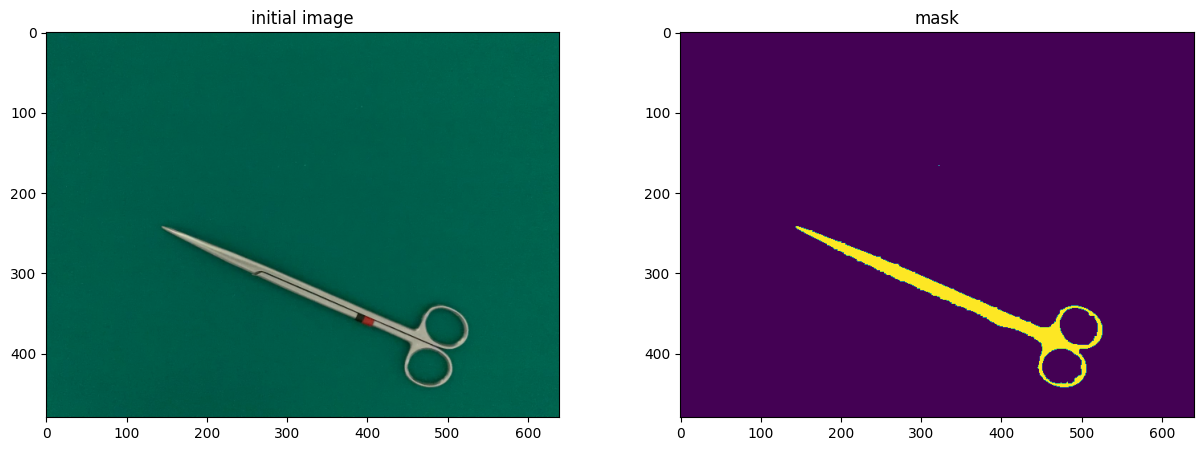

In [5]:
image_collection.plot(image_class='2', image=3)

### Assemble the basic information needed to generate the COCO annotation format (e.g. the categories)

In [6]:
info = {
    'description': 'surgical_tools_dataset',
    'url': str(),
    'version': '1.0',
    'year': 2023,
    'contributor': 'sts',
    'date_created': '11.05.2023',
    'categories': [
        [1, 'instrument_1'],
        [2, 'instrument_2'],
        [3, 'instrument_3'],
        [4, 'instrument_4'],
        [5, 'instrument_5'],
        [6, 'instrument_6'],
        [7, 'instrument_7']
    ],
    'supercategory': 'surgical_instuments'
}


### Generate polygons and corresponding COCO annotations and save as file

In [7]:
image_collection.make_coco_json(information=info)
image_collection.save()

Images saved


### Extract objects and inspect image(s)

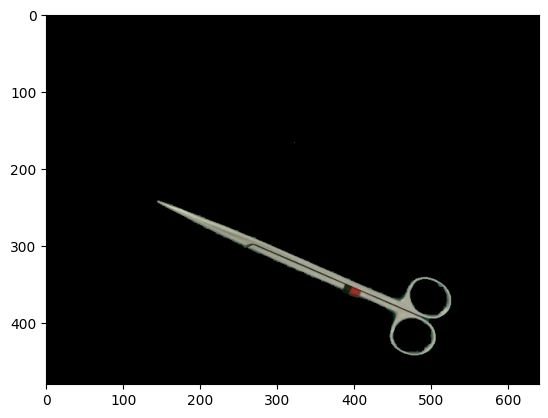

In [8]:
objects = image_collection.extract_objects()
# plot the image
plt.imshow(objects['2'][3])

### Show the plain background image

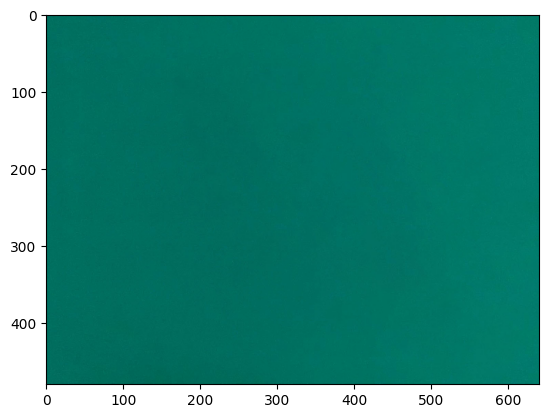

In [9]:
background = image_collection.images['0'][4]
# plot the image
plt.imshow(background)

## Augmentation Workflow

### Define some options for the augmentation and start the augmentation process

In [10]:
augmentation = Augmentation(objects, [background])
coco, names, augmentations = augmentation.augment(
    num_augmentation=100,
    max_num_objects=4,
    size=(0.6, 1),
    hue_shift=(-180, 180),
    rotation=True
)

### inspect augmentet image(s)

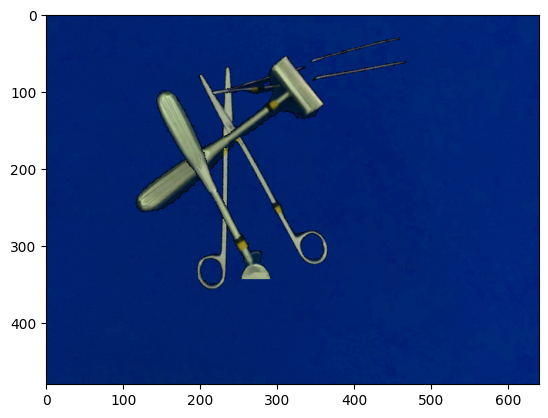

In [11]:
image = random.choice(augmentations)
# randomly choose a image from the augmented images and plot it
plt.imshow(image)

### Save the augementet images

In [12]:
augmentation.save()

Images saved
